# Camera Extrinsics

#### Objective

- Compute the position of a camera $(R, t)$ relative to a known marker arrangement. 
- The markers here are the corners of the squares on a checkerboard with known dimensions.

[First Principles of Computer Vision | Camera Calibration](https://www.youtube.com/watch?v=S-UHiFsn-GI&list=PL2zRqk16wsdoCCLpou-dGo7QQNks1Ppzo)

<img src="i/f2.png" width=800>



The position $t \in R^3$ and orientation $R ∈ SO(3)$ of a camera with respect to some 
“world” frame are often jointly referred to as the camera `extrinsic parameters`. 

Once obtained, the **extrinsics** can be used to transform a 3D point in the world frame $P ∈ R^3$ into a 3D point in
the camera frame $P^{\prime} ∈ R^3$ as follows:

$$P^{\prime} = RP + t$$

- $R$ and $t$ represent the position and orientation of the world frame with respect to the camera frame.

The goal of this problem is to compute $(R, t)$ of a camera for a world frame that lies on the surface of a chessboard.

### Chessboard 

Everything in this problem starts with a single image of a checkerboard: p1_data/checkerboard.png
- We use a checkerboard because we can easily physically measure the side-lengths of the squares 
- For our problem the squares have a dimension of 0.0205m
- The black and white pattern of the checkerboard has high contrast making it easy to find the features that we are going to
use for calibration, square “cross-junctions”

<img src="i/f1.png" width=600>


### Corners/Feature Extraction

The first step towards computing the pose of the camera relative to the checkerboard is accurately estimating
the position of the cross-junctions in the image frame. 

- In the image of the checkerboard, which pixels correspond to the cross-junctions?
- Solution is to apply a series of transformations on the image that isolate the high-contrast regions of the squares on the board, and use the Harris Corner Detection Algorithm to detect the cross-junctions.
- Use `cv2.findChessboardCorners(...)` along with the corner parameters below to extract the cross-junction pixel locations, 
- Plot cross-junction pixels on top of the image using the ax.plot(...) function

```python
ncorners_y = 7
ncorners_x = 9
```

corners.shape: (63, 2)
u: [409.75568 373.57596 339.7811 ]
v: [337.2855  332.3364  326.45688]


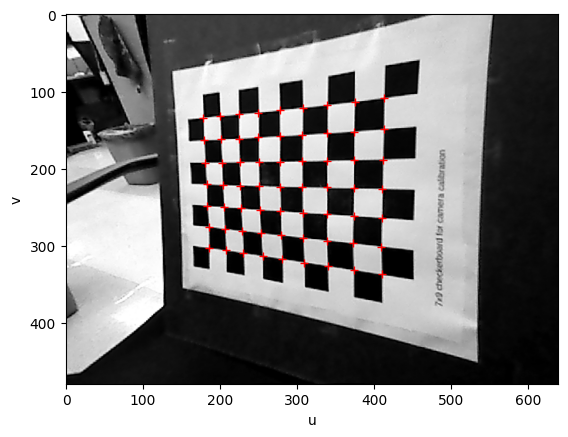

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
np.random.seed(789)
ncorners_y, ncorners_x = 7, 9

def findCorners(image_location, ncorners_y=7, ncorners_x=9, plot=True):
    image = cv2.imread(image_location, 0)
    _, corners = cv2.findChessboardCorners(image, (ncorners_x, ncorners_y)) 
    corners = corners.squeeze()

    if plot:
        ax = plt.subplot()
        ax.imshow(image, cmap="gray")
        ax.set_ylabel("v")
        ax.set_xlabel("u")
        ax.plot(corners[:, 0], corners[:, 1], "r+")
    
    return corners

corners = findCorners("p1_data/checkerboard.png")
print(f"corners.shape: {corners.shape}")
print(f"u: {corners[0:3, 0]}")
print(f"v: {corners[0:3, 1]}")

### extrinsic $(R, t)$

<img src="i/f2.png" width=800>

In this problem we use a known camera intrinsics matrix $K$, the known distance between
cross-junctions $(0.0205 m)$, and the cross-junction image coordinates, **corners**, to compute 
the relative position and rotation of the camera to the chessboard $(R, t)$

<img src="i/f3.png" width=800>

In [11]:
from numpy.linalg import norm, inv, svd

K = np.array([
    [471.14628085,  -4.94771211, 295.13159043], 
    [0., 436.71106326, 240.96582594], 
    [0., 0., 1.]])

print(f"K:\n {K}")

SQUARE_SIZE = 0.0205
xmeters = SQUARE_SIZE * np.arange(ncorners_x)
ymeters = SQUARE_SIZE * np.arange(ncorners_y)

t = np.zeros(3)
R = np.eye(3)
print(f"t:\n{t}")
print(f"R:\n{R}")

K:
 [[471.14628085  -4.94771211 295.13159043]
 [  0.         436.71106326 240.96582594]
 [  0.           0.           1.        ]]
t:
[0. 0. 0.]
R:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
